# Zillow Zestimate Workbook

In [1]:
# Import for data manipulation and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Import for Acquisition and Prep
import os
import env
import wrangle

# Import for Scaling and Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import for Clustering
from sklearn.cluster import KMeans

# Import to see all the data
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import to avoid showing warnings
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition 

In [2]:
# def acquire_zillow(use_cache=True):
    
#     filename = ('zillow.csv')
#     if os.path.exists(filename) and use_cache:
#         print('Using CSV')
#         return pd.read_csv(filename)
    
#     print('Acquiring from Database')
#     url = env.get_db_url('zillow')

#     zillow = pd.read_sql('''
#     SELECT *
#     FROM properties_2017
#     JOIN (SELECT parcelid as pid, MAX(transactiondate) as maxdate FROM predictions_2017 GROUP BY parcelid) as last_date
#     ON last_date.pid = parcelid
#     LEFT JOIN (SELECT parcelid as pid, transactiondate as maxdate, logerror FROM predictions_2017) as log
#     ON last_date.pid = log.pid AND last_date.maxdate = log.maxdate
#     LEFT JOIN propertylandusetype
#     USING(propertylandusetypeid)
#     LEFT JOIN storytype
#     USING(storytypeid)
#     LEFT JOIN typeconstructiontype
#     USING(typeconstructiontypeid)
#     LEFT JOIN airconditioningtype
#     USING(airconditioningtypeid)
#     LEFT JOIN architecturalstyletype
#     USING(architecturalstyletypeid)
#     LEFT JOIN buildingclasstype
#     USING(buildingclasstypeid)
#     LEFT JOIN heatingorsystemtype
#     USING(heatingorsystemtypeid)
#     ''',url)

#     print('Saving to CSV')
#     zillow.to_csv('zillow.csv',index=False)
#     return zillow

In [3]:
# zillow = wrangle.acquire_zillow()
# zillow.shape

## Data Preperation

### Data Cleaning

In [4]:
# (zillow['calculatedfinishedsquarefeet'] >= zillow['finishedsquarefeet12'])

In [5]:
# zillow[['bathroomcnt','calculatedbathnbr','fullbathcnt']]

#### Drop undusable columns and rows

In [6]:
# zillow.drop(columns=['id','pid','parid','maxdate'],inplace=True)

In [7]:
# zillow.shape

In [8]:
# zillow.dropna(subset=['latitude','longitude'],inplace=True)

In [9]:
# zillow.shape

In [10]:
# zillow = zillow[zillow['propertylandusetypeid'].isin([260,261,263,264,266,267,269])]

In [11]:
# zillow.shape

In [12]:
# zillow = zillow[~zillow['unitcnt'].isin([2.0,3.0,4.0,6.0])]

In [13]:
# zillow.shape

In [14]:
# def handle_missing_values(df,required_col,required_row):
    # required_row = round(df.shape[1] * required_row)
    # required_col = round(df.shape[0] * required_col)
    # df.dropna(axis=0, thresh=required_row, inplace=True)
    # df.dropna(axis=1, thresh=required_col, inplace=True)
    # return df

In [15]:
# zillow = handle_missing_values(zillow,0.4,0.4)

In [16]:
# zillow.shape

In [17]:
# zillow.dropna(inplace=True)

In [18]:
# zillow.shape

In [19]:
# zillow = zillow.drop(columns=['propertylandusetypeid','unitcnt'])

In [20]:
# def cleanup_zillow(df):
#     df.drop(columns=['id','pid','maxdate'],inplace=True)
#     df.dropna(subset=['latitude','longitude'],inplace=True)
#     df = df[df['propertylandusetypeid'].isin([260,261,263,264,266,267,269])]
#     df = df[~df['unitcnt'].isin([2.0,3.0,4.0,6.0])]
#     df = df.drop(columns=['propertylandusetypeid','unitcnt'])
#     handle_missing_values(df,0.5,0.5)
#     df.dropna(inplace=True)
#     return df

In [21]:
# zillow = wrangle.cleanup_zillow(zillow)

In [22]:
# zillow.shape

In [23]:
# zillow.info()

In [24]:
# Code to see value counts in rows
# zillow[['landtaxvaluedollarcnt']].value_counts(dropna=False).sort_values(ascending=False)

#### After looking through each rows value counts the following was found:

**Drop for now** ----

- heatingorsystemtypeid: redundant
- propertylandusetypeid: redundant
- unitcnt: only has 1 value of 1 as designed in the problem
- assessmentyear: only has 2016 value
- roomcnt: only has 0 value (EXPLORE FOR LATER)
- fips: only has 1 county value (EXPLORE FOR LATER)
- regionidcounty: only has 1 county value (EXPLORE FOR LATER)
- rawcensustractandblock : didnt find useful
- censustractandblock : didnt find useful
- calculatedbathnbr : redundant
- fullbathcnt: redundant
- finishedsquarefeet12 : 95% the same as calculatedfinishedsquarefeet so a bit redundant
- structuretaxvaluedollarcnt : part of taxvaluedollarcnt
- landtaxvaluedollarcnt : part of taxvaluedollarcnt
- propertycountylandusecode

**Explore for Outliers** ----

- bathroomcnt
- bedroomcnt
- buildingqualitytypeid
- calculatedfinishedsquarefeet
- lotsizesquarefeet
- age
- regionidcity
- regionidzip
- taxvaluedollarcnt
- taxamount
- latitude
- longitude

**Encode** ---- 

- propertylandusedesc
- heatingorsystemdesc

**Feature Engineering** -----

- Change yearbuilt to age as of sale(2017)

**Research further** -----

- propertycountylandusecode
- propertyzoningdesc
- regionidcity
- regionidzip

### Fixing Features

In [25]:
#zillow.info()

In [26]:
#zillow['month_sold'] = pd.DatetimeIndex(zillow.date_sold).month

In [27]:
#zillow['age'] = 2017 - zillow.yearbuilt 

In [28]:
# zillow = zillow.rename(columns={'bedroomcnt' : 'bedrooms',\
#                                 'bathroomcnt' : 'bathrooms',\
#                                 'buildingqualitytypeid' : 'quality_id',\
#                                 'calculatedfinishedsquarefeet' : 'area',\
#                                 'lotsizesquarefeet' : 'lot_size',\
#                                 'propertyzoningdesc' : 'Zoning',\
#                                 'regionidcity' : 'city',\
#                                 'regionidzip' : 'zip',\
#                                 'taxvaluedollarcnt' : 'taxable_value',\
#                                 'propertylandusedesc' : 'land_use',\
#                                 'heatingorsystemdesc' : 'heating_desc'})

In [29]:
# zillow.info()

### Encode

In [30]:
# zillow = wrangle.cleanup_zillow(wrangle.acquire_zillow())

In [31]:
# zillow.info()

In [32]:
#zillow.land_use.value_counts()

In [33]:
# def encode_zillow_cat(df,col_list):
#     dummy_name = pd.get_dummies(df[col_list])
#     df = pd.concat([df,dummy_name],axis=1) 
#     return df

In [34]:
# col = ['land_use']
# zillow = wrangle.encode_zillow_cat(zillow,col)

In [35]:
# df.land_use = df.land_use.map({'Single Family Residential' : 'single_family',\
#                                        'Planned Unit Development' : 'planned_unit'})

### Outliers

In [36]:
# def remove_outliers(df, column_list):
#     ''' remove outliers from dataframe 
#         then return the new dataframe
#     '''
#     # Iterate through column_list
#     for col in column_list:
        
#         # find percentiles
#         q_25 = np.percentile(df[col], 25)
#         q_75 = np.percentile(df[col], 75)
        
#         # Calculate IQR
#         iqr = q_75 - q_25
        
#         # assign upper bound
#         upper_bound = q_75 + 1.5 * iqr   
        
#         # assign lower bound 
#         lower_bound = q_25 - 1.5 * iqr   

#         # assign df without outliers
#         df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
#     # return dataframe without outliers    
#     return df

In [37]:
# zillow.info()

In [38]:
# col = ['bathrooms','bedrooms','area','latitude','longitude','lot_size','taxable_value','taxamount','logerror','age']

# zillow = wrangle.remove_outliers(zillow, col)

### Univariate

In [39]:
# def initial_look(df):
#     print(f'Shape:\n\n{df.shape}\n\n')
#     print(f'Describe:\n\n{df.describe(include="all")}\n\n')
#     print(f'Info:\n\n{df.info()}\n\n')
#     print(f'Histograms:\n\n{df.hist(figsize=(40,20), bins =20), plt.show()}')

In [40]:
# wrangle.initial_look(zillow)

In [41]:
# def missing_rows(df):
#     return pd.concat([
#            df.isna().sum().rename('count'),
#            df.isna().mean().rename('percent')
#            ], axis=1)

In [42]:
# wrangle.missing_rows(zillow)

In [43]:
# def missing_columns(df):
#     col_missing = pd.concat([
#     df.isna().sum(axis=1).rename('num_cols_missing'),
#     df.isna().mean(axis=1).rename('pct_cols_missing'),
#     ], axis=1).value_counts().sort_index()
#     col_missing = pd.DataFrame(col_missing)
#     col_missing.rename(columns={0:'num_rows'},inplace=True)
#     return col_missing.reset_index()

In [44]:
# wrangle.missing_columns(zillow)

### Split and Scale

In [45]:
# def split_df(df):
#     '''
#     This funciton splits the dataset for modeling into:
#     train - for exploring the data, and fitting the models
#     validate - for ensuring the model is not overfit
#     test - for testing the model on unseen data
#     '''
#     # This seperates out the test data from the train and validate data. Test makes up 20 % of the data.
#     train_validate, test = train_test_split(df, random_state=1729, test_size=0.2)
    
#     # This seperates out the train and validates sets. Train makes up 56 % of the data and Validate makes up 24 %.
#     train, validate = train_test_split(train_validate, random_state=1729, test_size=0.3)
    
#     # The funciton returns the split sets
#     return train, validate, test

In [46]:
# train, validate, test = wrangle.split_df(zillow)

In [47]:
# train.info()

### Scale

In [48]:
# def scale_zillow(df,col):

#     df_scaled = df[col]

#     minmax = MinMaxScaler()
#     minmax.fit(df[col])

#     df_scaled[col] = minmax.transform(df[col])
    
#     return df_scaled

In [49]:
# def scale_data(train, validate, test, return_scaler=False):
#     '''
#     This function scales the split data and returns a scaled version of the dataset.
    
#     If return_scaler is true, the scaler will be returned as well.
#     '''
    
#     col = train.columns[train.dtypes == 'float']
#     col = col.append(train.columns[train.dtypes == 'int'])

#     train_scaled = train[col]
#     validate_scaled = validate[col]
#     test_scaled = test[col]

#     scaler = MinMaxScaler()
#     scaler.fit(train[col])
    
#     train_scaled[col] = scaler.transform(train[col])
#     validate_scaled[col] = scaler.transform(validate[col])
#     test_scaled[col] = scaler.transform(test[col])
    
#     if return_scaler:
#         return train_scaled, validate_scaled, test_scaled, scaler
#     else:
#         return train_scaled, validate_scaled, test_scaled

### Model Split

In [50]:
# def model_split(df):
    
#     # Assign x for testing the model, y as target for modeling
#     X = df.drop(columns=['taxable_value'])
#     y = df[['taxable_value']]
    
#     return X, y

## Explore

In [51]:
train, validate, test = wrangle.wrangle_zillow(wrangle.acquire_zillow())

Using CSV


In [52]:
train.head()

parcelid  bathrooms  bedrooms    area    latitude    longitude  \
3802   11272421        2.0       3.0  1565.0  34711546.0 -118166471.0   
44481  14254598        2.5       4.0  2090.0  33754633.0 -117825936.0   
30210  12739096        2.0       3.0  1546.0  33916848.0 -118016375.0   
61289  10903713        2.0       2.0  1283.0  34158000.0 -118416000.0   
2254   10826047        2.0       2.0  1216.0  34206000.0 -118440000.0   

       lot_size     city      zip  yearbuilt  taxable_value  taxamount  \
3802     7370.0   5534.0  97319.0     2003.0       225000.0    3845.14   
44481    9000.0  27491.0  97016.0     1967.0       580287.0    6683.14   
30210    6940.0   5465.0  96190.0     1959.0       497472.0    6327.80   
61289   31532.0  12447.0  96424.0     1964.0       332570.0    4063.01   
2254    12146.0  12447.0  96414.0     1982.0       103849.0    1354.45   

        date_sold  logerror       land_use  month_sold   age  land_use_condo  \
3802   2017-01-18  0.028716  single_family           1  14.0               0   
44481  2017-06-14 -0.026519  single_family           6  50.0               0   
30210  2017-04-21 -0.025266  single_family           4  58.0               0   
61289  2017-08-31 -0.001017          condo           8  53.0               1   
2254   2017-01-11  0.042313          condo           1  35.0               1   

       land_use_planned_unit  land_use_single_family  
3802                       0                       1  
44481                      0                       1  
30210                      0                       1  
61289                      0                       0  
2254                       0                       0

In [53]:
X_train, y_train = wrangle.model_split(train)
X_validate, y_validate = wrangle.model_split(validate)
X_test, y_test = wrangle.model_split(test)

In [54]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.scale_data(X_train,X_validate,X_test)

In [55]:
X_train_scaled.head()

bathrooms  bedrooms      area  latitude  longitude  lot_size      city  \
3802    0.285714  0.428571  0.330105  0.995112   0.683307  0.151003  0.005198   
44481   0.428571  0.571429  0.475374  0.301072   0.864824  0.185505  0.061059   
30210   0.285714  0.428571  0.324848  0.418725   0.763313  0.141902  0.005022   
61289   0.285714  0.285714  0.252075  0.593630   0.550300  0.662433  0.022785   
2254    0.285714  0.285714  0.233536  0.628444   0.537507  0.252096  0.022785   

            zip  yearbuilt  taxable_value  taxamount       age  parcelid  \
3802   0.004402   0.871287       0.177035   0.290850  0.128713  0.003681   
44481  0.003405   0.514851       0.468558   0.508300  0.485149  0.023269   
30210  0.000685   0.435644       0.400606   0.481073  0.564356  0.013314   
61289  0.001455   0.485149       0.265300   0.307543  0.514851  0.001259   
2254   0.001422   0.663366       0.077628   0.100011  0.336634  0.000749   

       month_sold  
3802        0.000  
44481       0.625  
30210       0.375  
61289       0.875  
2254        0.000

### Correlation

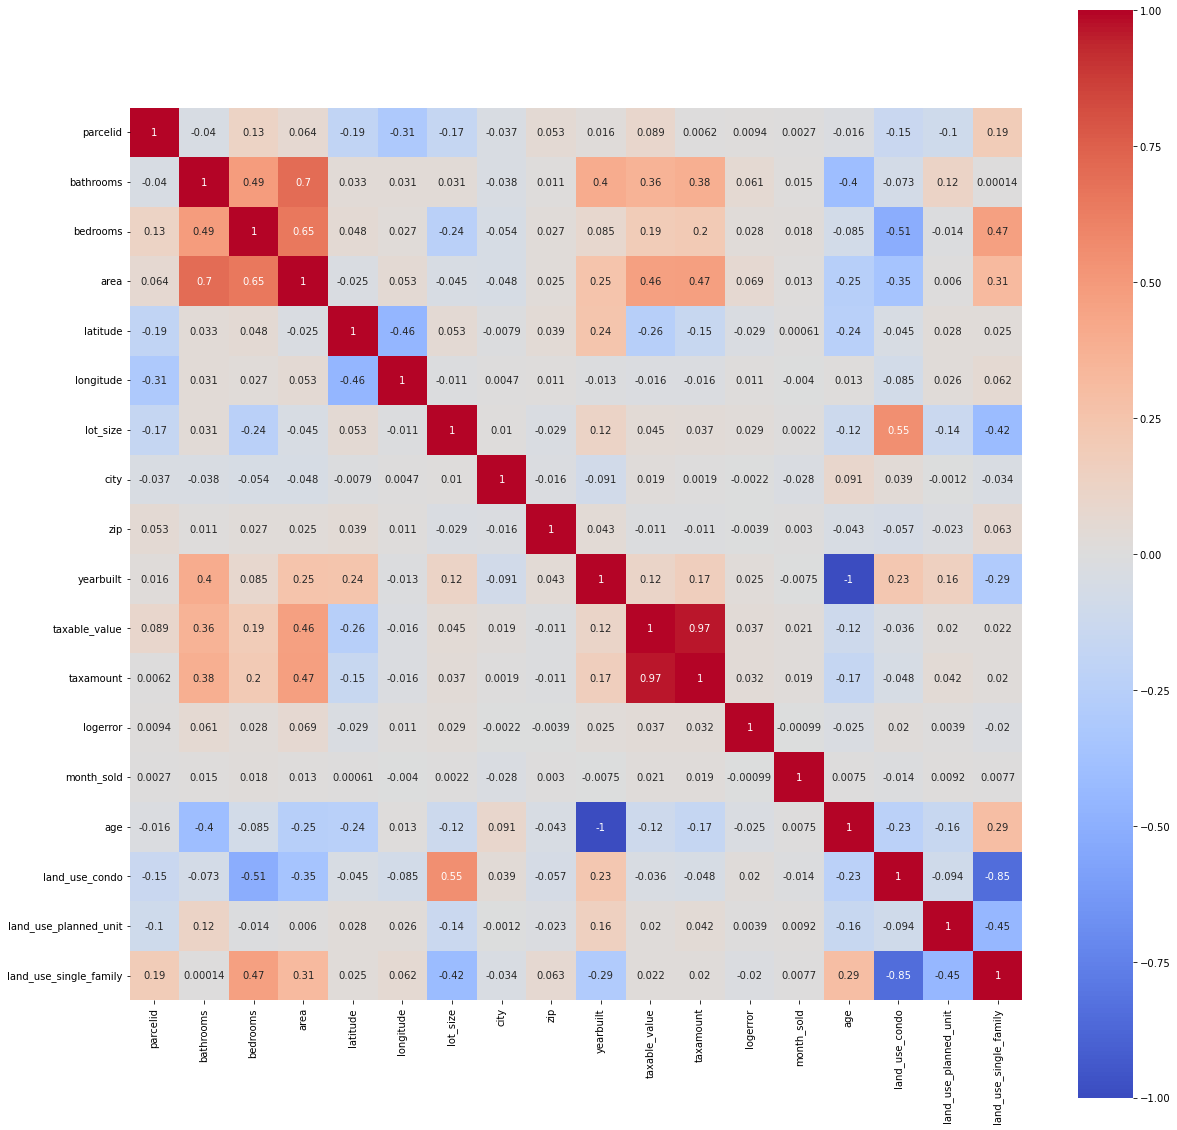

In [56]:
# Perform a Pearson Correlation on the dataset
plt.figure(figsize=(20,20))
correlate = train.corr()
sns.heatmap(correlate, annot=True, cmap='coolwarm',square=True)
plt.show()

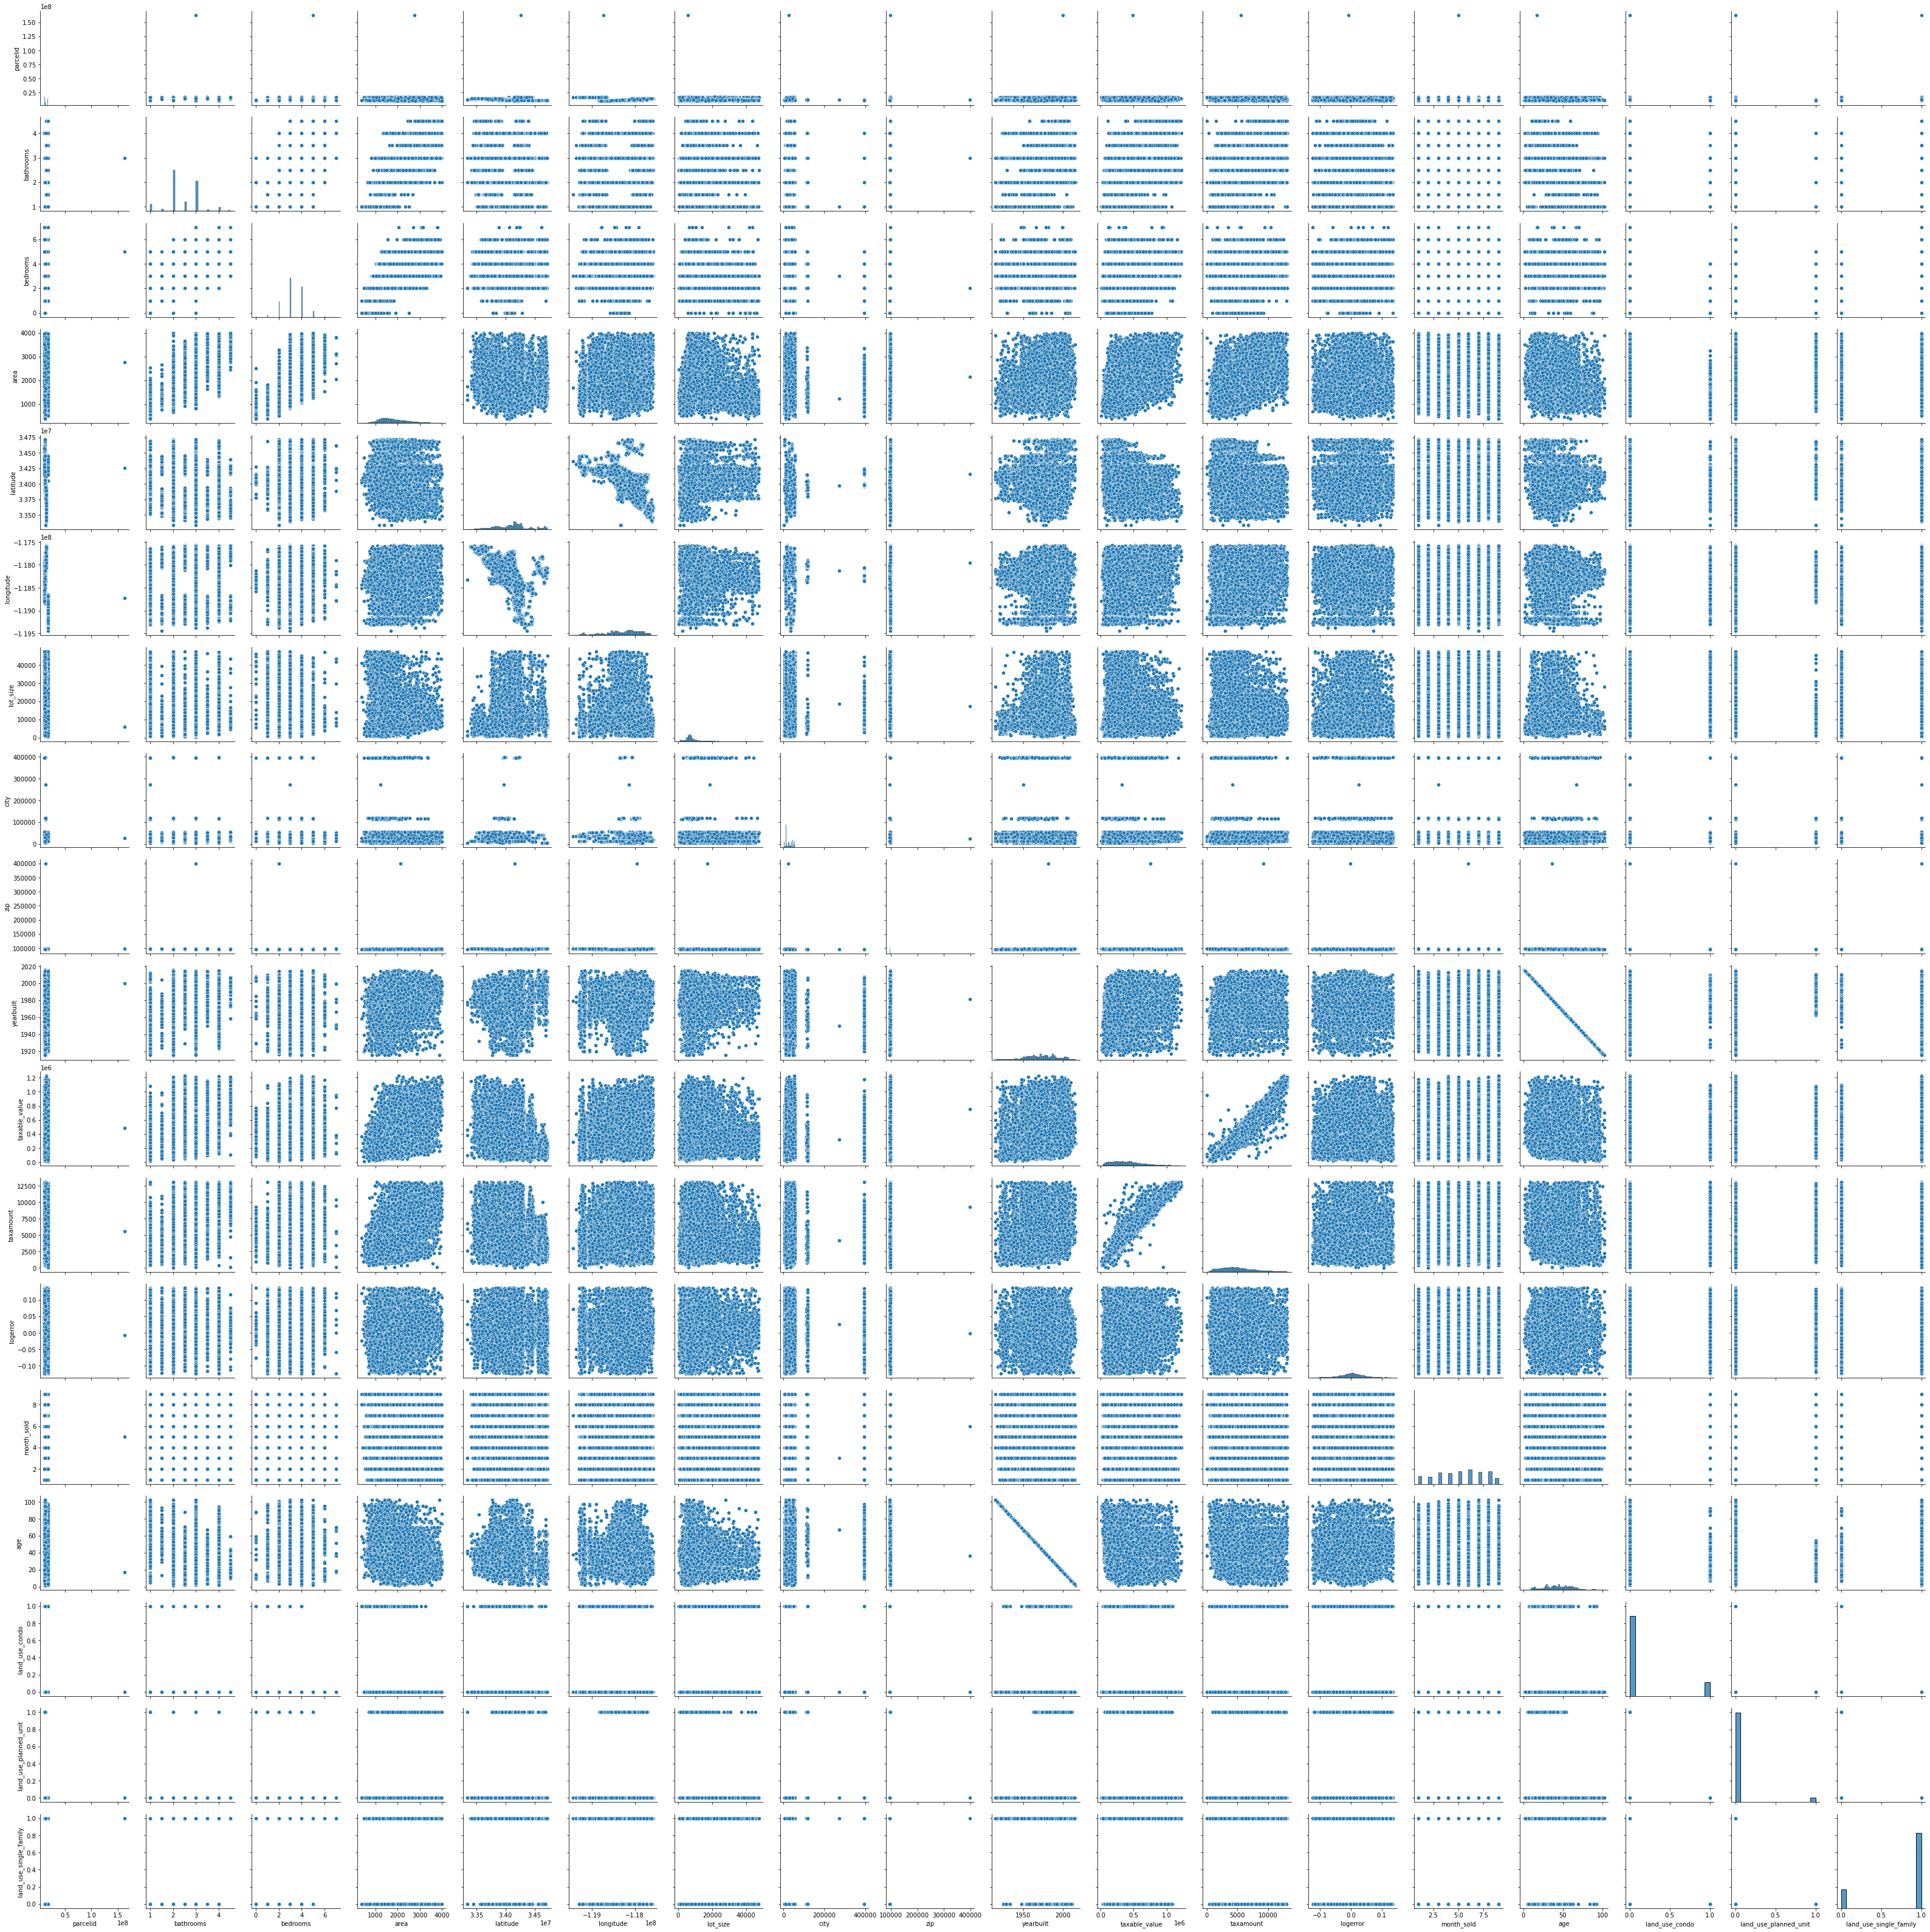

In [57]:
sns.pairplot(train)
plt.show()

### Is Logerror affected by Location?

#### Visuals

In [58]:
# train.logerror.value_counts(bins=20).sort_index()

In [59]:
# # 3d plot (Figure it out)
# fig = plt.figure(figsize = (20,20))
# ax = plt.axes(projection='3d')
              
# xdata = train.latitude
# ydata = train.longitude
# zdata = train.logerror

# ax.set_xlabel('Latitude')
# ax.set_ylabel('Longitude')
# ax.set_zlabel('Logerror')

# ax.scatter3D(xdata,ydata,zdata,color='green');

# ## Change year built to age. Bin age then maybe lat/long

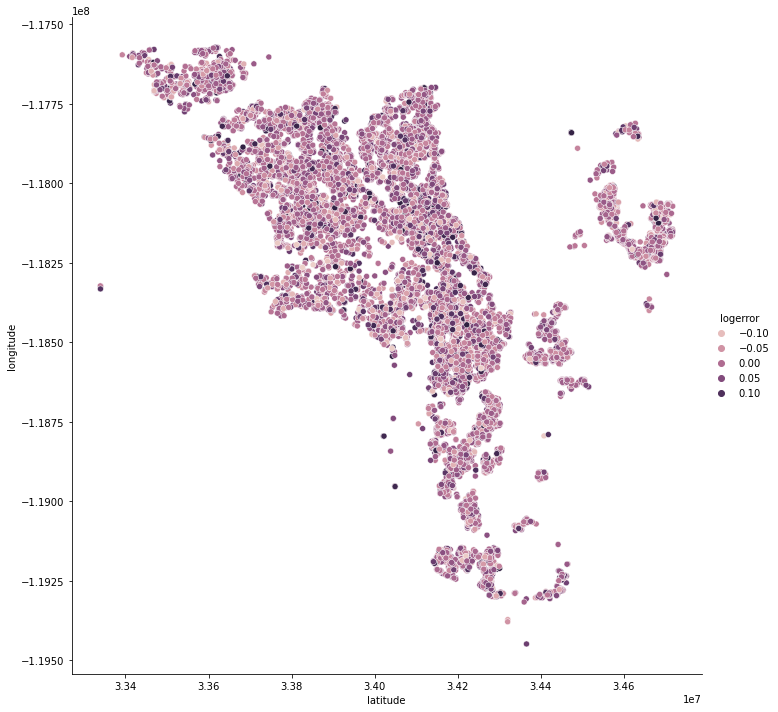

In [60]:
sns.relplot(x='latitude',y='longitude',data=train, hue='logerror',height=10)
plt.show()

In [61]:
# sns.relplot(x='city',y='zip',data=train, hue='logerror',height=10)
# plt.show()

In [62]:
# sns.relplot(x='latitude',y='longitude',data=train, hue='city',height=10)
# plt.show()

In [63]:
# sns.relplot(x='latitude',y='longitude',data=train, hue='zip',height=10)
# plt.show()

Visual Summary: Lat and Long seem to tell more. City and Zip don't seem to be of a lot of use.

#### Hypothesis Testing

- $H_0$ = 
- $H_α$ = 

In [64]:
# Hypothesis Test



Summary: 

- $H_0$ = 
- $H_α$ = 

In [65]:
# Hypothesis Test



Summary: 

### Is Logerror affected by the house attributes?

#### Visuals

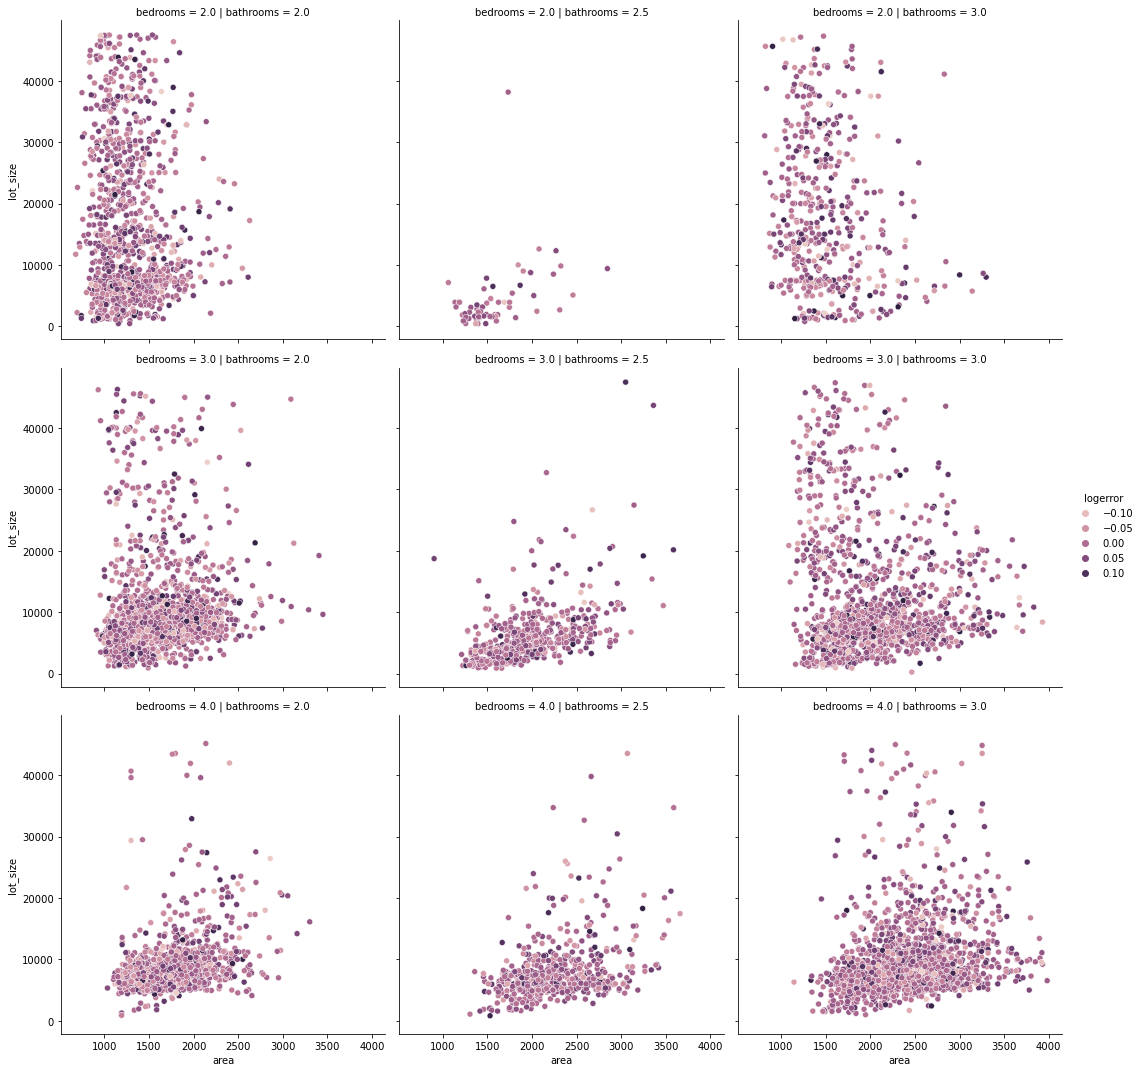

In [66]:
sns.relplot(x='area', y='lot_size', data=train[(train.bedrooms >= 2)& (train.bedrooms < 5)& (train.bathrooms <=3)& (train.bathrooms >= 2)], hue= 'logerror', col='bathrooms', row='bedrooms')
plt.show()

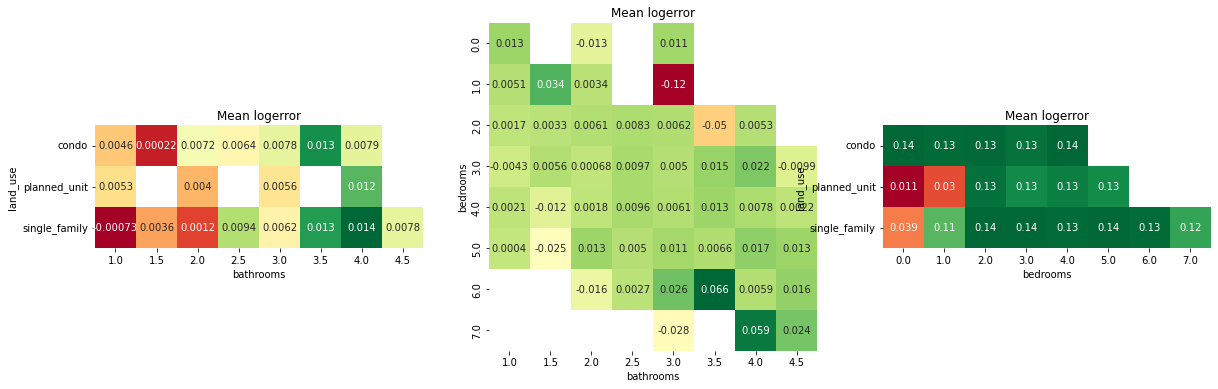

In [103]:
fig, ax = plt.subplots(ncols=3,figsize=(20,20))

min = pd.crosstab(index = train['land_use'], columns = train['bathrooms'], values = train['logerror'], aggfunc='mean')
sns.heatmap(min, annot=True,ax=ax[0],square=True,cbar=False,cmap='RdYlGn')
ax[0].title.set_text('Mean logerror')

mean = pd.crosstab(index = train['bedrooms'], columns = train['bathrooms'], values = train['logerror'], aggfunc='mean')
sns.heatmap(mean, annot=True,ax=ax[1],square=True,cbar=False,cmap='RdYlGn')
ax[1].title.set_text('Mean logerror')

max = pd.crosstab(index = train['land_use'], columns = train['bedrooms'], values = train['logerror'], aggfunc='max')
sns.heatmap(max, annot=True,ax=ax[2],square=True,cbar=False,cmap='RdYlGn')
ax[2].title.set_text('Mean logerror')

plt.show()

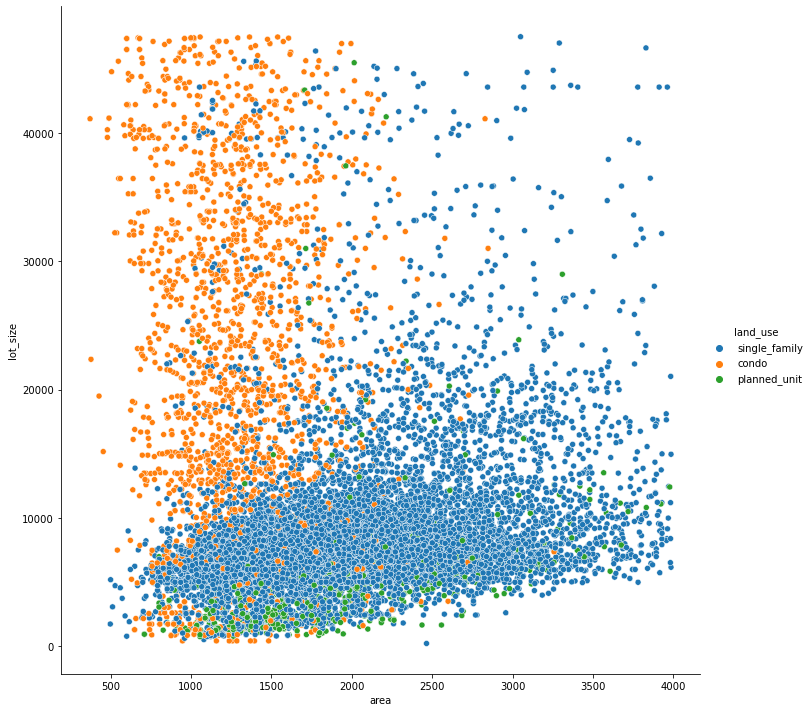

In [68]:
sns.relplot(x='area', y='lot_size', data=train, hue= 'land_use', height=10)
plt.show()

In [69]:
# sns.boxplot(x='area',y='lot_size',data=train)

#### Hypothesis Testing

- $H_0$ = 
- $H_α$ = 

### Is Logerror affected by the age of the property?

#### Visuals

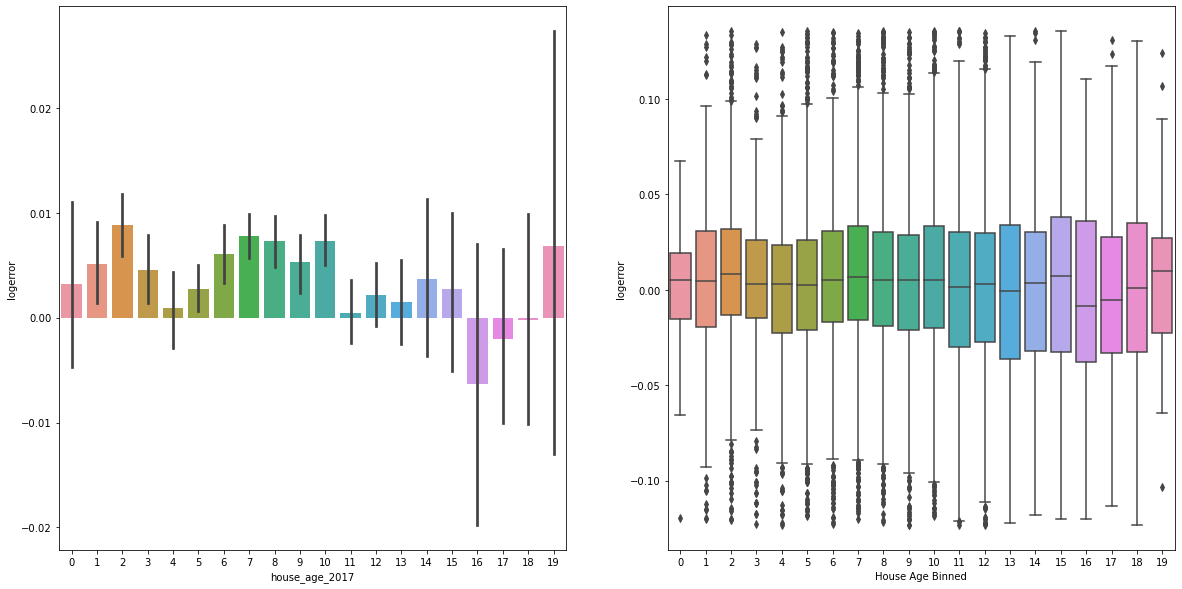

In [70]:
# import pandas for binning data
import pandas as pd
# Make copy to bin
train_age = train.copy()
# Bin data
train_age['house_age_2017'] = pd.cut(train_age.age, 20,labels=False)
# setup subplots
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
# barplot
sns.barplot(x='house_age_2017', y='logerror', data=train_age,ax=ax[0])
# boxplot
sns.boxplot(x='house_age_2017', y='logerror', data=train_age,ax=ax[1])
plt.xlabel('House Age Binned')
plt.show()

In [71]:
# train.age.value_counts().sort_index()

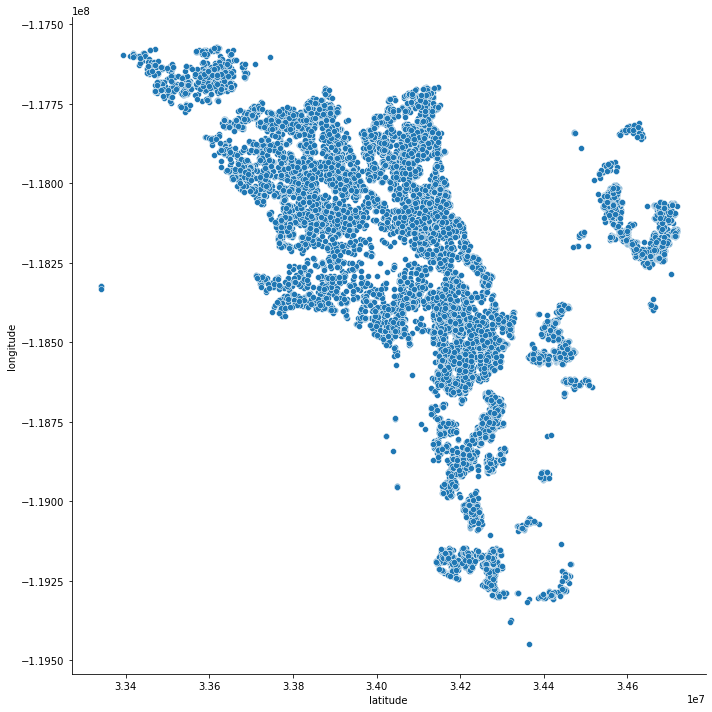

In [72]:
sns.relplot(x='latitude',y='longitude',data=train,height=10)
plt.show()

In [73]:
# # 3d plot (Figure it out)
# fig = plt.figure(figsize = (20,20))
# ax = plt.axes(projection='3d')
              
# xdata = train.latitude
# ydata = train.longitude
# zdata = train.yearbuilt

# ax.set_xlabel('Latitude')
# ax.set_ylabel('Longitude')
# ax.set_zlabel('yearbuilt')

# ax.scatter3D(xdata,ydata,zdata,color='green');

# ## Change year built to age. Bin age then maybe lat/long

#### Hypothesis Testing

- $H_0$ = 
- $H_α$ = 

### Is logerror affected by the time of year it is sold?

#### Visuals

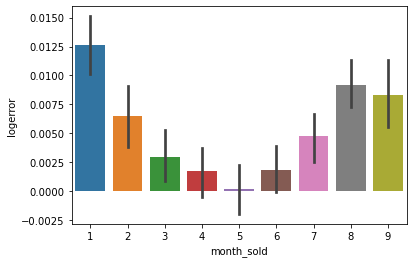

In [105]:
# barplot
sns.barplot(x='month_sold', y='logerror', data=train_age)
plt.show()

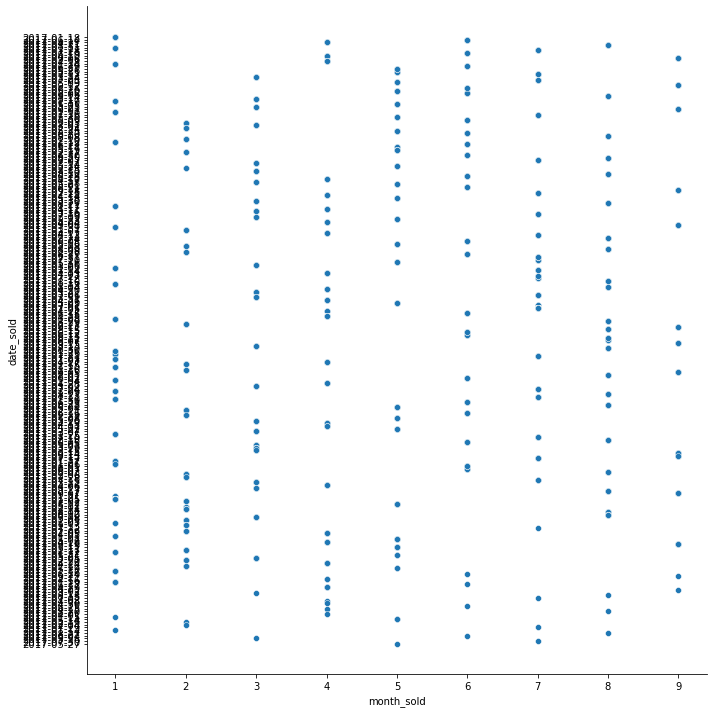

In [75]:
sns.relplot(x='month_sold',y='date_sold',data=train,height=10)
plt.show()

#### Hypothesis Testing

- $H_0$ = 
- $H_α$ = 

### Is logerror affected by the tax values?

#### Visuals

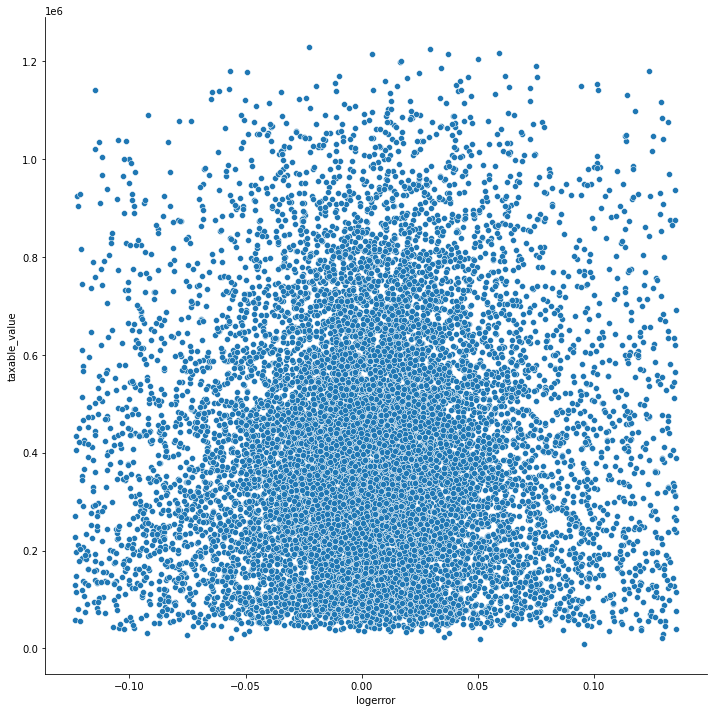

In [76]:
sns.relplot(x='logerror',y='taxable_value',data=train,height=10)
plt.show()

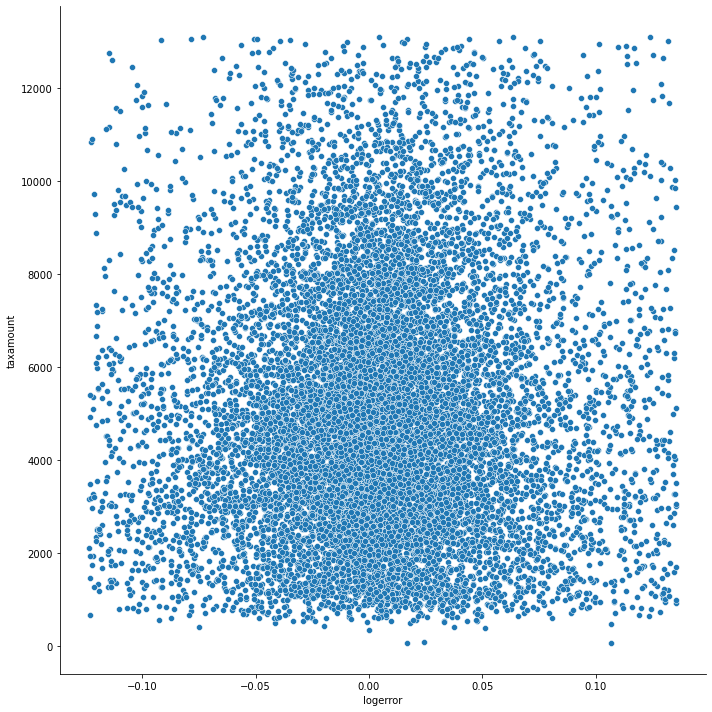

In [77]:
sns.relplot(x='logerror',y='taxamount',data=train, height=10)
plt.show()

#### Hypothesis Testing

$H_0$ = 
$H_α$ = 

### Logerror and 

#### Visuals

In [78]:
# sns.relplot(x='calculatedfinishedsquarefeet',y='taxvaluedollarcnt',data=train[(train.logerror > -0.5) & (train.logerror < 0.5)], hue= 'logerror',height=10)
# plt.show()

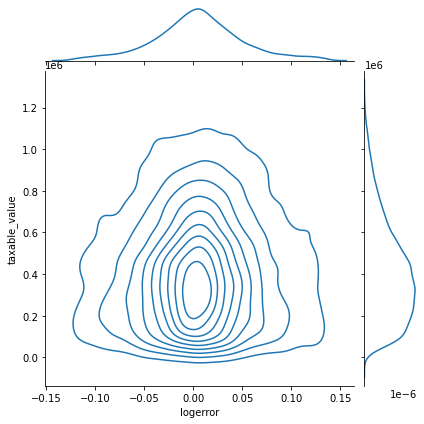

In [106]:
sns.jointplot(x='logerror', y='taxable_value', data=train, kind='kde')
plt.show()

In [80]:
# # 3d plot (Figure it out)
# fig = plt.figure(figsize = (20,20))
# ax = plt.axes(projection='3d')
              
# xdata = train.calculatedfinishedsquarefeet
# ydata = train.taxvaluedollarcnt
# zdata = train.logerror

# ax.set_xlabel('square feet')
# ax.set_ylabel('tax value')
# ax.set_zlabel('logerror')

# ax.scatter3D(xdata,ydata,zdata,color='green');

#### Hypothesis Testing

- $H_0$ = 
- $H_α$ = 

## Cluster

### Kmeans House Attributes:

In [81]:
X = X_train[['area','lot_size','land_use_condo','land_use_planned_unit',\
                  'land_use_single_family']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

X_train['cluster'] = kmeans.predict(X)
X_train_scaled['cluster'] = kmeans.predict(X)

#### Inertia:

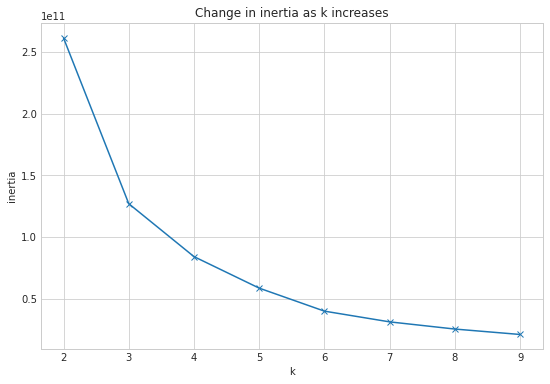

In [82]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Kmeans Tax

In [83]:
X2 = X_train_scaled[['taxable_value','taxamount']]

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X2)

kmeans2.predict(X2)

X_train['cluster2'] = kmeans2.predict(X2)
X_train_scaled['cluster2'] = kmeans2.predict(X2)

#### Intertia

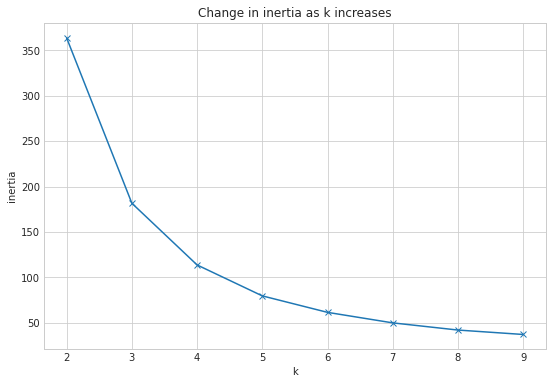

In [84]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Kmeans Location

In [85]:
X3_train = X_train_scaled[['latitude','longitude']]
X3_validate = X_validate_scaled[['latitude','longitude']]
X3_test = X_test_scaled[['latitude','longitude']]

kmeans3 = KMeans(n_clusters=4)

kmeans3.fit(X3_train)
kmeans3.predict(X3_train)
X_train['cluster3'] = kmeans3.predict(X3_train)
X_train_scaled['cluster3'] = kmeans3.predict(X3_train)

kmeans3.predict(X3_validate)
X_validate_scaled['cluster3'] = kmeans3.predict(X3_validate)

kmeans3.predict(X3_test)
X_test_scaled['cluster3'] = kmeans3.predict(X3_test)

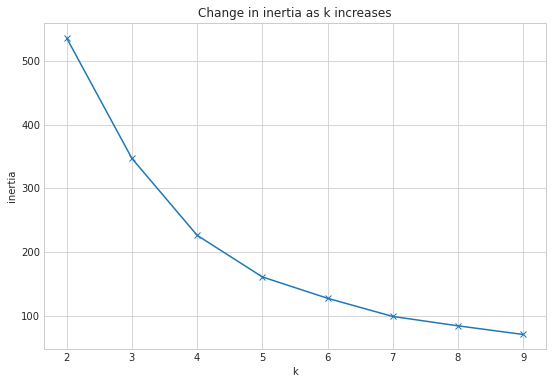

In [87]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3_train).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Kmeans month sold and Location

In [88]:
X4 = X_train[['latitude','longitude','month_sold']]

kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(X4)

kmeans4.predict(X4)

X_train['cluster4'] = kmeans4.predict(X4)
X_train_scaled['cluster4'] = kmeans4.predict(X4)

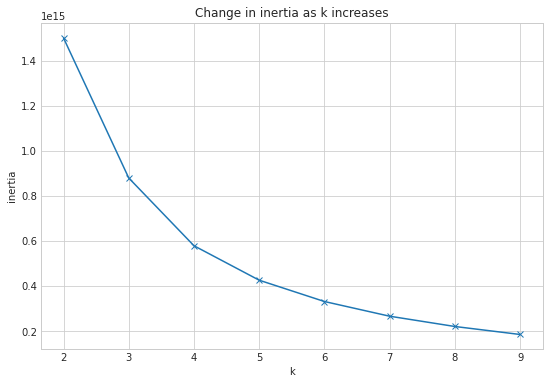

In [89]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X4).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Kmeans Age and location

In [90]:
X5 = X_train[['latitude','longitude','age']]

kmeans5 = KMeans(n_clusters=3)
kmeans5.fit(X5)

kmeans5.predict(X5)

X_train['cluster5'] = kmeans5.predict(X5)
X_train_scaled['cluster5'] = kmeans5.predict(X5)

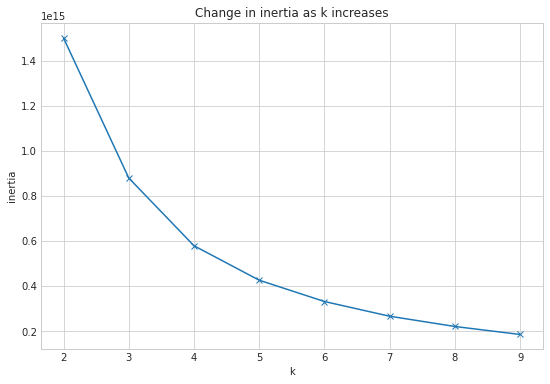

In [91]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X5).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## Feature Engineering

#### SelectKBest

In [92]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# We use SelectKBest to run a f_regression stats test and return the top 3
f_selector = SelectKBest(f_regression, k=5)

# We fit this to our data
f_selector.fit(X_train_scaled, y_train)

# Create a boolean mask to find out which were selected
feature_mask = f_selector.get_support()

# We get a list of the top 3 features by name
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature

['bathrooms', 'area', 'taxable_value', 'taxamount', 'cluster']

In [93]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2, random_state=1729)
# pca.fit(X_train_scaled)
# X = pca.transform(X_train_scaled)
# print(pca.n_components_)
# print(len(X))
# print(pca.explained_variance_ratio_)
# print(X[0:5])

### RFE

In [111]:
# Import models
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor,LocalOutlierFactor

# Import for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


# initialize Linear Regression model
lm = LinearRegression()

# Create Recursive Feature Elimination model
rfe = RFE(lm, n_features_to_select=5)

# fit the model
rfe.fit(X_train_scaled, y_train)

# get mask of columns selected
feature_mask = rfe.support_

# get list of selected column names
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

# Create list of variables and their ranking

# ranks
var_ranks = rfe.ranking_

# names
var_names = X_train_scaled.columns.tolist()

# combine to dataframe
rfe_ranks_df = pd.DataFrame({'Variable' : var_names, 'Rank' : var_ranks})

# sort
rfe_ranks_df.sort_values('Rank')

Variable  Rank
9   taxable_value     1
11            age     1
10      taxamount     1
8       yearbuilt     1
7             zip     1
12       parcelid     2
18       cluster5     3
17       cluster4     4
2            area     5
0       bathrooms     6
5        lot_size     7
3        latitude     8
1        bedrooms     9
4       longitude    10
16       cluster3    11
15       cluster2    12
14        cluster    13
6            city    14
13     month_sold    15

## Model

### Baseline

In [95]:
# Import models
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

# Import for model evaluation
from sklearn.metrics import mean_squared_error

In [96]:
# Predict logerror_pred_mean
logerror_pred_mean = y_train['logerror'].mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# compute logerror_pred_median
logerror_pred_median = y_train['logerror'].median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)

print("RMSE Baseline using Mean\nTrain(In-Sample): ", round(rmse_train, 2), 
      "\nValidate(Out-of-Sample): ", round(rmse_validate, 2))

# RMSE of taxable_value_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)

print("RMSE using Median\nTrain(In-Sample): ", round(rmse_train, 2), 
      "\nValidate(Out-of-Sample): ", round(rmse_validate, 2))

RMSE Baseline using Mean
Train(In-Sample):  0.05 
Validate(Out-of-Sample):  0.04
RMSE using Median
Train(In-Sample):  0.05 
Validate(Out-of-Sample):  0.04


### Models

#### Linear Regression

In [97]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model
lm.fit(X_train_scaled[['bathrooms', 'area', 'taxable_value', 'taxamount', 'cluster3']], y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled[['bathrooms', 'area', 'taxable_value', 'taxamount', 'cluster3']])

# evaluate: rmse_train
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled[['bathrooms', 'area', 'taxable_value', 'taxamount', 'cluster3']])

# evaluate: rmse_validate
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for Ordinary Least Squares using LinearRegression\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for Ordinary Least Squares using LinearRegression
Training(In-Sample):  0.045216131231830374 
Validation(Out-of-Sample):  0.044303240246776725


#### Lasso Lars

In [98]:
# create the model object 
lars = LassoLars(alpha=1.0)

# fit the model 
lars.fit(X_train_scaled[['bathrooms','yearbuilt','taxable_value','taxamount','lot_size']], y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])

# evaluate: rmse_train
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])

# evaluate: rmse_validate
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for Lasso + Lars
Training(In-Sample):  0.045359349885810224 
Validation(Out-of-Sample):  0.04442473394848872


#### Tweedie Regressor

In [102]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0) 

# fit the model
glm.fit(X_train_scaled[['zip','yearbuilt','taxable_value','taxamount','age']], y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])

# evaluate: rmse_train
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])

# evaluate: rmse_validate
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for GLM using Tweedie
Training(In-Sample):  0.04532244046040565 
Validation(Out-of-Sample):  0.04435296291130722


#### Polynomial Regression

In [100]:
# make the polynomial features 
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])
X_test_degree2 = pf.transform(X_test_scaled[['zip','yearbuilt','taxable_value','taxamount','age']])

In [101]:
# create the model
plm = LinearRegression(normalize=True)

# fit the model
plm.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_plm'] = plm.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_plm)**(1/2)

# predict validate
y_validate['logerror_pred_plm'] = plm.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_plm)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining(In-Sample): ", rmse_train, 
      "\nValidation(Out-of-Sample): ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training(In-Sample):  0.04522937243376502 
Validation(Out-of-Sample):  0.04685641472552945


#### Test Data

In [ ]:
y_test_scaled = pd.DataFrame(y_test)

# predict on test
y_test['logerror_pred_plm'] = plm.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_plm)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTest(Out-of-Sample): ", rmse_test)